#### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd 
import os
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Loading the data

In [2]:
DATA_DIR = 'instacart-market-basket-analysis/'

In [81]:
def load_data(in_path, name):
    df = pd.read_csv(in_path)
    display(df.head(5))
    return df

datasets={}  # Storing the datasets in a dictionary to keep track of them easily

ds_names = ("aisles", "departments", "order_products__prior","order_products__train","orders","products",
            "sample_submission")

for i in ds_names:
    datasets[i] = load_data(os.path.join(DATA_DIR, f'{i}.csv'), i)



,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


,order_id,products
0,17,39276 29259
1,34,39276 29259
2,137,39276 29259
3,182,39276 29259
4,257,39276 29259


In [4]:
datasets['aisles'].head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [5]:
datasets['aisles'].isnull().sum()

aisle_id    0
aisle       0
dtype: int64

In [6]:
datasets['aisles'].shape

(134, 2)

In [7]:
datasets['aisles'].describe(include='all')

,aisle_id,aisle
count,134.000000,134
unique,NaN,134
top,NaN,frozen vegan vegetarian
freq,NaN,1
mean,67.500000,NaN
std,38.826537,NaN
min,1.000000,NaN
25%,34.250000,NaN
50%,67.500000,NaN
75%,100.750000,NaN


In [8]:
datasets['departments'].head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [9]:
datasets['departments'].shape

(21, 2)

In [10]:
datasets['departments'].isnull().sum()

department_id    0
department       0
dtype: int64

In [11]:
datasets['order_products__prior'].head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [12]:
datasets['order_products__prior'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


In [13]:
datasets['order_products__prior'].shape

(32434489, 4)

In [14]:
datasets['order_products__prior'].isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [15]:
datasets['order_products__train'].head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [16]:
datasets['order_products__train'].shape

(1384617, 4)

In [17]:
datasets['order_products__train'].isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [18]:
datasets['order_products__train'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB


In [19]:
datasets['orders'].head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [20]:
datasets['orders'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [21]:
datasets['orders'].shape

(3421083, 7)

In [22]:
datasets['orders'].isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [23]:
datasets['products'].head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [24]:
datasets['products'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [25]:
datasets['products'].isnull().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [26]:
datasets['products'].shape

(49688, 4)

In [29]:
#Displaying the shape of all the dataframes
for i in datasets.keys():
    print(f' {i:20}: [ {datasets[i].shape[0]:10,}, {datasets[i].shape[1]}]')

 aisles              : [        134, 2]
 departments         : [         21, 2]
 order_products__prior: [ 32,434,489, 4]
 order_products__train: [  1,384,617, 4]
 orders              : [  3,421,083, 7]
 products            : [     49,688, 4]
 sample_submission   : [     75,000, 2]


## Exploratory Data Analysis 

In [30]:
datasets['products'].info()
datasets['order_products__train'].info()
datasets['aisles'].info()
datasets['departments'].info()
products = datasets['products']
order_products__train = datasets['order_products__train']
aisles = datasets['aisles']
departments = datasets['departments']
orders = datasets['orders']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---

In [31]:
#Merging the order train dataset with product, department and aisle based on the columns
order = pd.merge(order_products__train, products, how='left', on='product_id').merge(
                 aisles,on='aisle_id',how='left').merge(
                 departments,on='department_id',how='left')
 


In [32]:
order.head()


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs
2,1,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables,produce
3,1,49683,4,0,Cucumber Kirby,83,4,fresh vegetables,produce
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods


In [33]:
order_final = pd.merge(order, orders, how='left', on='order_id')

In [34]:
order_final.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs,112108,train,4,4,10,9.0
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs,112108,train,4,4,10,9.0
2,1,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables,produce,112108,train,4,4,10,9.0
3,1,49683,4,0,Cucumber Kirby,83,4,fresh vegetables,produce,112108,train,4,4,10,9.0
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods,112108,train,4,4,10,9.0


In [35]:
order_final.isnull().sum()

order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
product_name              0
aisle_id                  0
department_id             0
aisle                     0
department                0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

In [36]:
order_final.shape

(1384617, 15)

In [37]:
order_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1384617 entries, 0 to 1384616
Data columns (total 15 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   order_id                1384617 non-null  int64  
 1   product_id              1384617 non-null  int64  
 2   add_to_cart_order       1384617 non-null  int64  
 3   reordered               1384617 non-null  int64  
 4   product_name            1384617 non-null  object 
 5   aisle_id                1384617 non-null  int64  
 6   department_id           1384617 non-null  int64  
 7   aisle                   1384617 non-null  object 
 8   department              1384617 non-null  object 
 9   user_id                 1384617 non-null  int64  
 10  eval_set                1384617 non-null  object 
 11  order_number            1384617 non-null  int64  
 12  order_dow               1384617 non-null  int64  
 13  order_hour_of_day       1384617 non-null  int64  
 14  da

##### Distribution of the reordered column

Text(0.5, 1.0, 'Distribution of Reordered column')

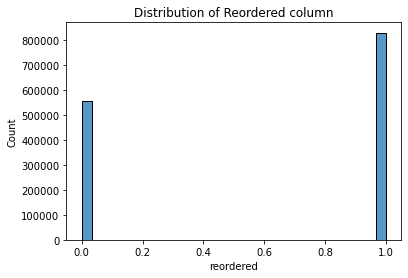

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.histplot(data=order_final, x=order_final['reordered'] , bins=30)

plt.title("Distribution of Reordered column")

Text(0.5, 1.0, 'Distribution of reordered column based on Department')

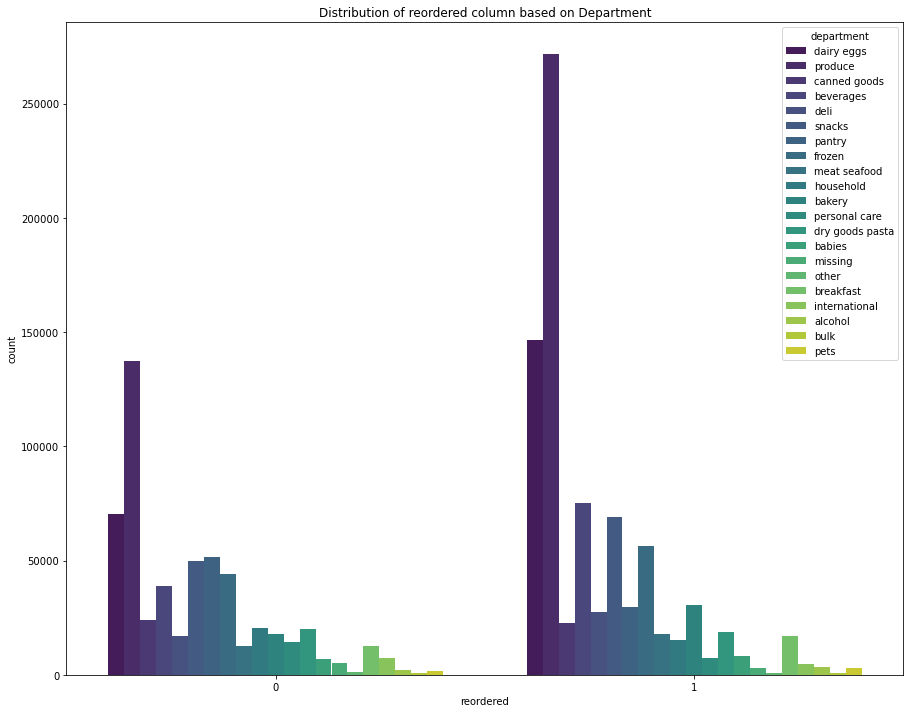

In [43]:
dpt = order_final['department']
plt.figure(figsize=(15,12))
sns.countplot(data = order_final, x= order_final['reordered'], hue=dpt, palette = 'viridis' )
plt.title("Distribution of reordered column based on Department")

So we can see from the distribution the most reordered item is produce

##### Distribution based on department

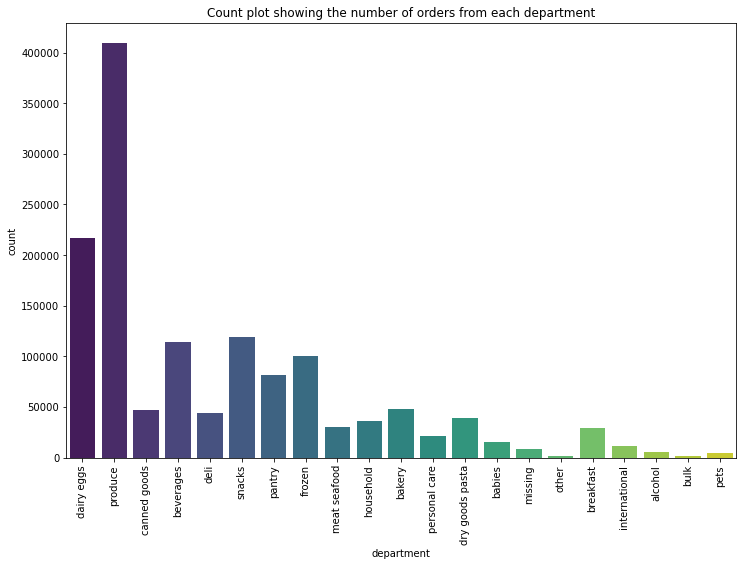

In [44]:
plt.figure(figsize=(12,8))
sns.countplot(data = order_final, x = order_final['department'] , palette = 'viridis')
plt.title("Count plot showing the number of orders from each department")
plt.xticks(rotation = 90)
plt.show()

##### Distribution based on products

In [45]:
prdct_ordered = order_final['product_name']

Banana                    18726
Bag of Organic Bananas    15480
Organic Strawberries      10894
Organic Baby Spinach       9784
Large Lemon                8135
Organic Avocado            7409
Organic Hass Avocado       7293
Strawberries               6494
Limes                      6033
Organic Raspberries        5546
Name: product_name, dtype: int64


<AxesSubplot:>

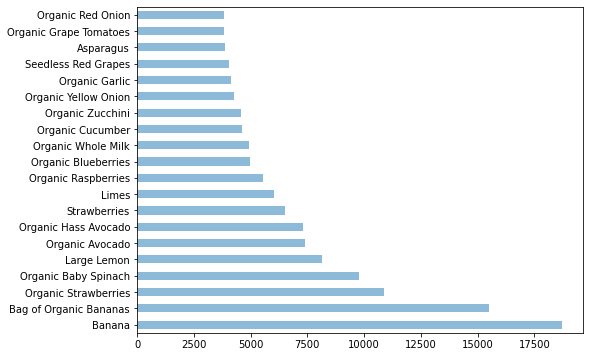

In [46]:

plt.figure(figsize=(8,6))
print(prdct_ordered.value_counts()[:10])
prdct_ordered.value_counts()[:20].plot(kind = 'barh',alpha=0.5)


We can see that the most ordered products are Bananas followed by Bag of organic bananas and list goes on

In [47]:
prdct_reorderd = order_final.groupby(by='product_name',as_index=False).agg({'reordered':'sum'}).sort_values(by='reordered',ascending=False)
prdct_reorderd.head()

,product_name,reordered
2814,Banana,16557
2641,Bag of Organic Bananas,13362
25128,Organic Strawberries,8603
22496,Organic Baby Spinach,8055
22465,Organic Avocado,6226


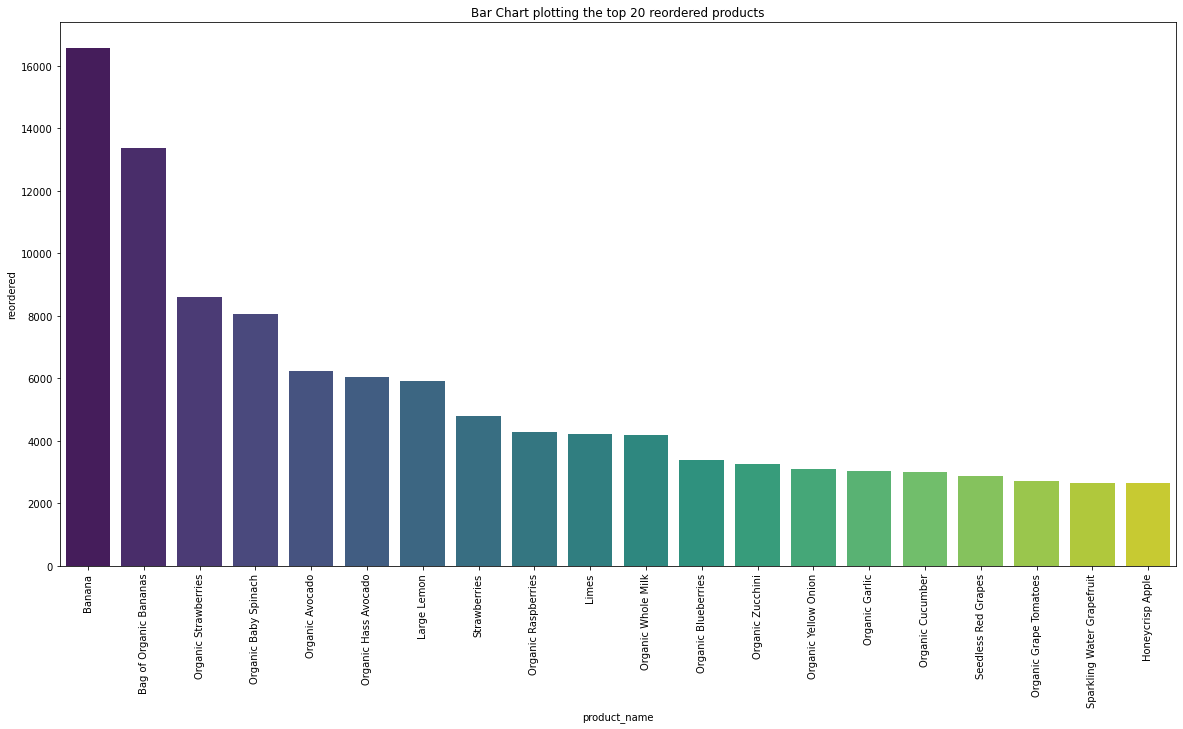

In [48]:
plt.figure(figsize=(20,10))
sns.barplot(data = prdct_reorderd[:20] ,x='product_name', y ='reordered', palette='viridis')
plt.title("Bar Chart plotting the top 20 reordered products")
plt.xticks(rotation = 90)
plt.show()

##### Distribution based on Aisles


In [49]:
aisle_reorderd = order_final.groupby(by='aisle',as_index=False).agg({'reordered':'sum'}).sort_values(by='reordered',ascending=False)
aisle_reorderd.head()

,aisle,reordered
50,fresh fruits,110782
53,fresh vegetables,91368
98,packaged vegetables fruits,51523
133,yogurt,37939
131,water seltzer sparkling water,27011


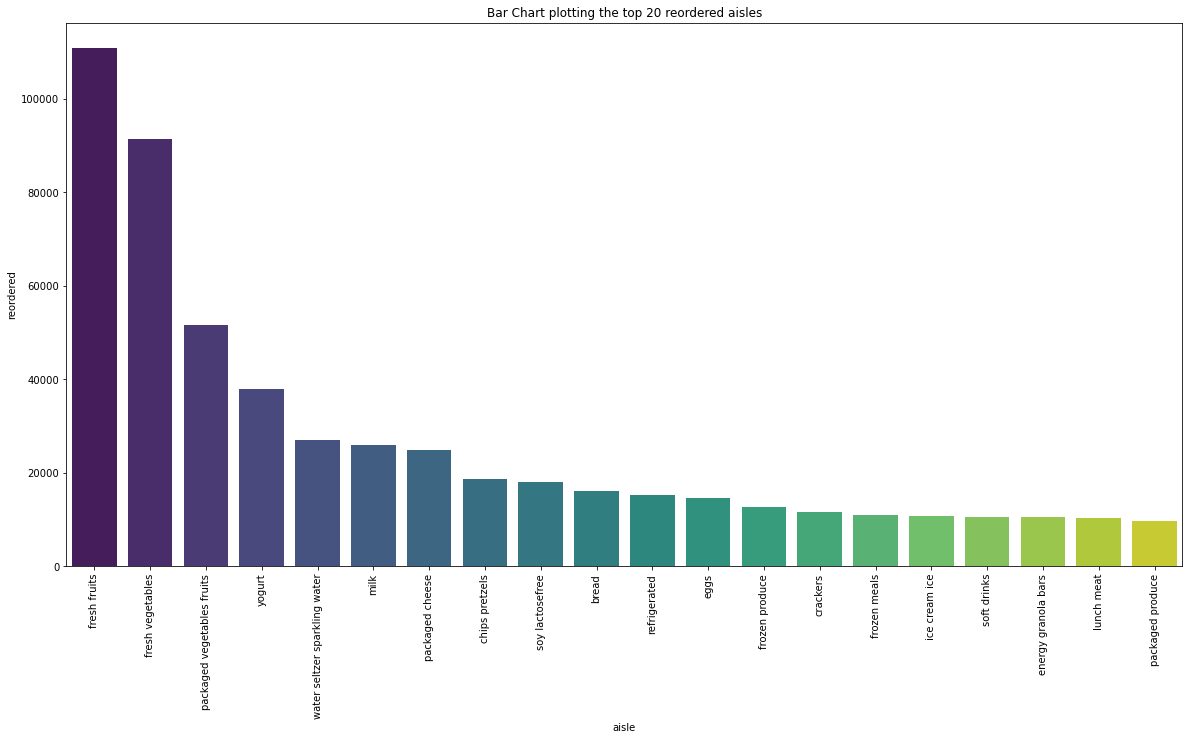

In [50]:
plt.figure(figsize=(20,10))
sns.barplot(data = aisle_reorderd[:20] ,x='aisle', y ='reordered', palette='viridis')
plt.title("Bar Chart plotting the top 20 reordered aisles")
plt.xticks(rotation = 90)
plt.show()

We can see that the most reordered products are from the aisle fresh fruits followed by fresh vegitables followed by packed vegetables fruits

In [51]:
order_final.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs,112108,train,4,4,10,9.0
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs,112108,train,4,4,10,9.0
2,1,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables,produce,112108,train,4,4,10,9.0
3,1,49683,4,0,Cucumber Kirby,83,4,fresh vegetables,produce,112108,train,4,4,10,9.0
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods,112108,train,4,4,10,9.0


##### Distribution based on Day of the week

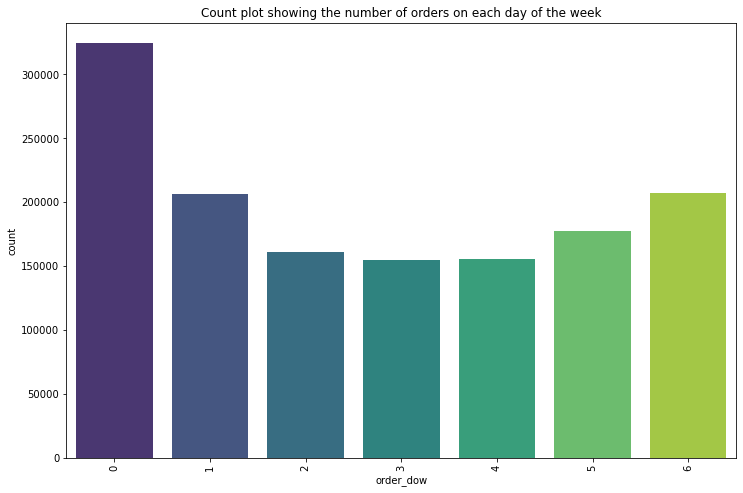

In [52]:
plt.figure(figsize=(12,8))
sns.countplot(data = order_final, x = order_final['order_dow'] , palette = 'viridis')
plt.title("Count plot showing the number of orders on each day of the week")
plt.xticks(rotation = 90)
plt.show()

In [53]:
dow_reorderd = order_final.groupby(by='order_dow',as_index=False).agg({'reordered':'sum'}).sort_values(by='reordered',ascending=False)
dow_reorderd.head()

,order_dow,reordered
0,0,197534
1,1,123376
6,6,123173
5,5,107239
2,2,94469


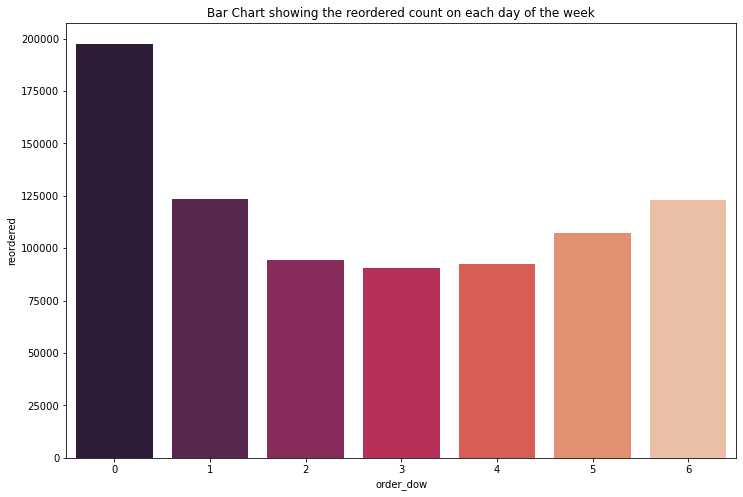

In [54]:
plt.figure(figsize=(12,8))
sns.barplot(data = dow_reorderd ,x='order_dow', y ='reordered', palette='rocket')
plt.title("Bar Chart showing the reordered count on each day of the week")
#plt.xticks(rotation = 90)
plt.show()

We can conclude that the most number of orders are done on day 0(Sunday) followed by day 6(Saturday) followed by day 1(Monday)

##### Distribution based on hour of the day

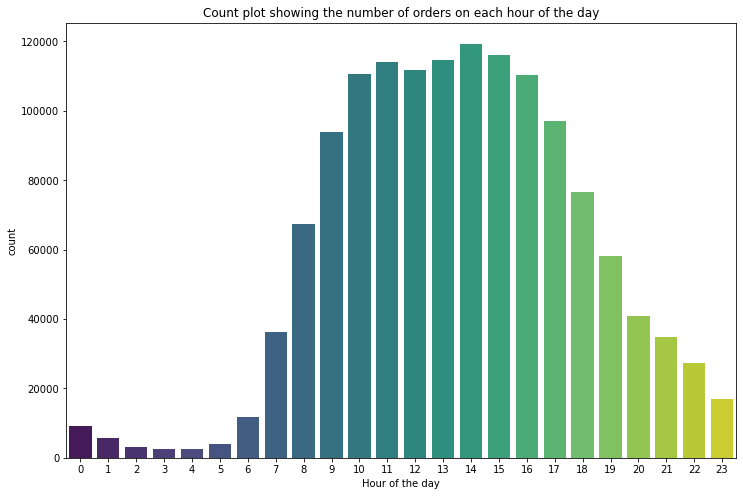

In [55]:
plt.figure(figsize=(12,8))
sns.countplot(data = order_final, x = order_final['order_hour_of_day'] , palette = 'viridis')
plt.title("Count plot showing the number of orders on each hour of the day")
plt.xlabel('Hour of the day')
plt.show()

In [56]:
ohd_reorderd = order_final.groupby(by='order_hour_of_day',as_index=False).agg({'reordered':'sum'}).sort_values(by='reordered',ascending=False)
ohd_reorderd['tot_count'] = order_final['order_hour_of_day'].value_counts()
ohd_reorderd.head()


,order_hour_of_day,reordered,tot_count
14,14,70691,119370
11,11,67835,114119
15,15,67788,116198
13,13,67656,114762
10,10,66992,110479


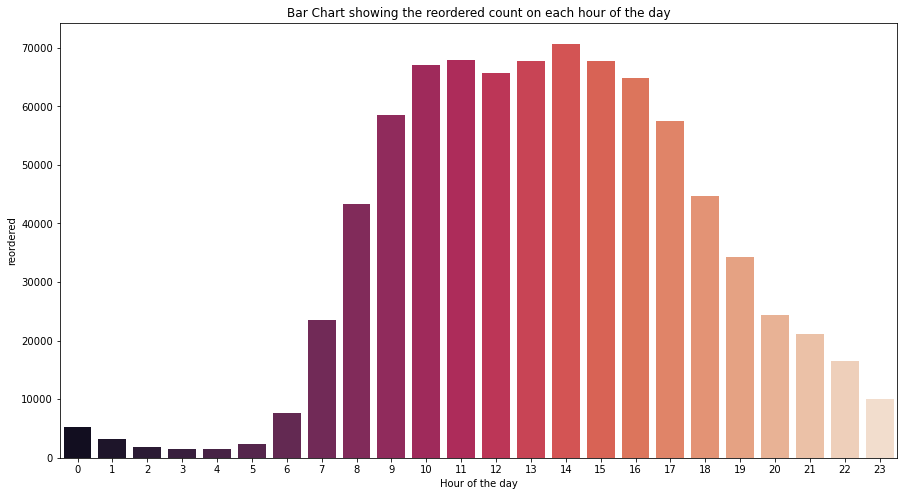

In [57]:
plt.figure(figsize=(15,8))
sns.barplot(data = ohd_reorderd ,x='order_hour_of_day', y ='reordered', palette='rocket')
plt.title("Bar Chart showing the reordered count on each hour of the day")
plt.xlabel('Hour of the day')
plt.show()

##### Distribution based days since prior order

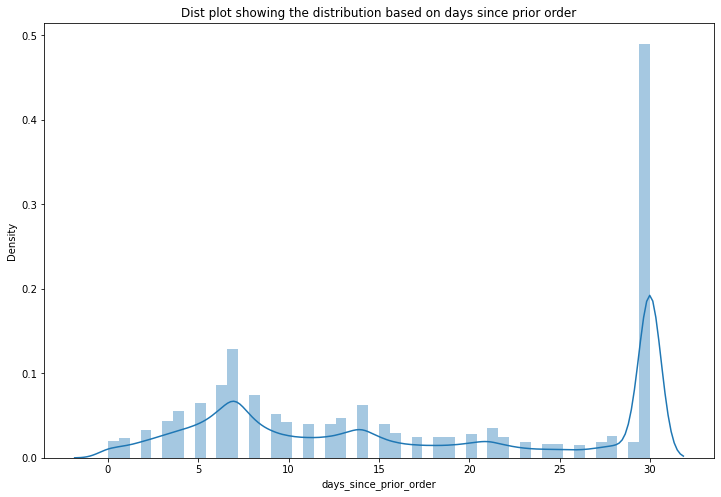

In [59]:
plt.figure(figsize=(12,8))
sns.distplot(order_final['days_since_prior_order'],hist=True)
plt.title("Dist plot showing the distribution based on days since prior order")
plt.show()

From the distribution it is evident that many users has done their prior order around 30 days

##### Distribution based on order done at an hour of the day


In [60]:
order_final['count'] = 1
ordered_time = order_final.groupby(['order_dow','order_hour_of_day'])['count'].count()
order_final.drop('count',axis = 1)
ordered_time.head()

order_dow  order_hour_of_day
0          0                    1568
           1                    1124
           2                     841
           3                     524
           4                     367
Name: count, dtype: int64

In [61]:
ordered_time = ordered_time.to_frame()
ordered_time.reset_index(inplace=True)
ordered_time.head()

,order_dow,order_hour_of_day,count
0,0,0,1568
1,0,1,1124
2,0,2,841
3,0,3,524
4,0,4,367


In [62]:
ordered_time['count'].max()

31000

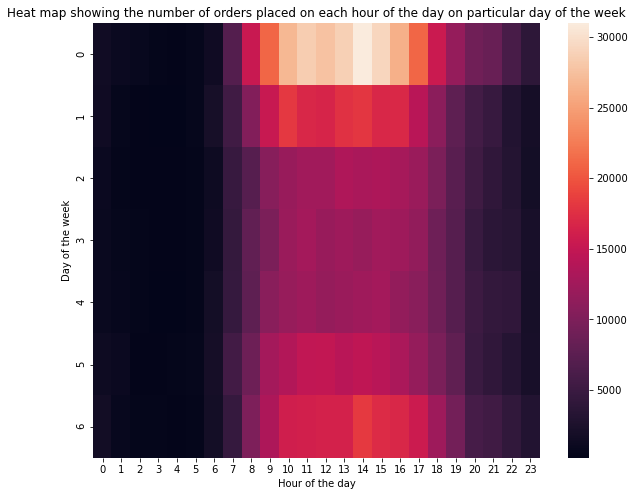

In [64]:
order_time_map = ordered_time.pivot("order_dow", "order_hour_of_day", "count")
plt.figure(figsize=(10,8))
ax = sns.heatmap(order_time_map)
plt.title("Heat map showing the number of orders placed on each hour of the day on particular day of the week")
plt.xlabel('Hour of the day')
plt.ylabel('Day of the week')
plt.show()

So we can see that the highest number of order was done on Day 0 at 14 th hour of the day

##### Products which was never reordered

In [65]:
order_final.head(2)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,count
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs,112108,train,4,4,10,9.0,1
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs,112108,train,4,4,10,9.0,1


In [66]:
not_reordered = order_final[order_final.reordered == 0]
not_reordered.head(2)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,count
2,1,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables,produce,112108,train,4,4,10,9.0,1
3,1,49683,4,0,Cucumber Kirby,83,4,fresh vegetables,produce,112108,train,4,4,10,9.0,1


In [67]:
not_reordered['count'] = 1
not_reordered = not_reordered.groupby(['product_id','product_name','aisle','department'])['count'].count()
not_reordered.head(2)

product_id  product_name                aisle              department
1           Chocolate Sandwich Cookies  cookies cakes      snacks        27
2           All-Seasons Salt            spices seasonings  pantry         3
Name: count, dtype: int64

In [68]:
not_reordered = not_reordered.to_frame()
not_reordered.reset_index(inplace=True)
not_reordered.head(5)

,product_id,product_name,aisle,department,count
0,1,Chocolate Sandwich Cookies,cookies cakes,snacks,27
1,2,All-Seasons Salt,spices seasonings,pantry,3
2,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,frozen meals,frozen,8
3,8,Cut Russet Potatoes Steam N' Mash,frozen produce,frozen,6
4,9,Light Strawberry Blueberry Yogurt,yogurt,dairy eggs,3


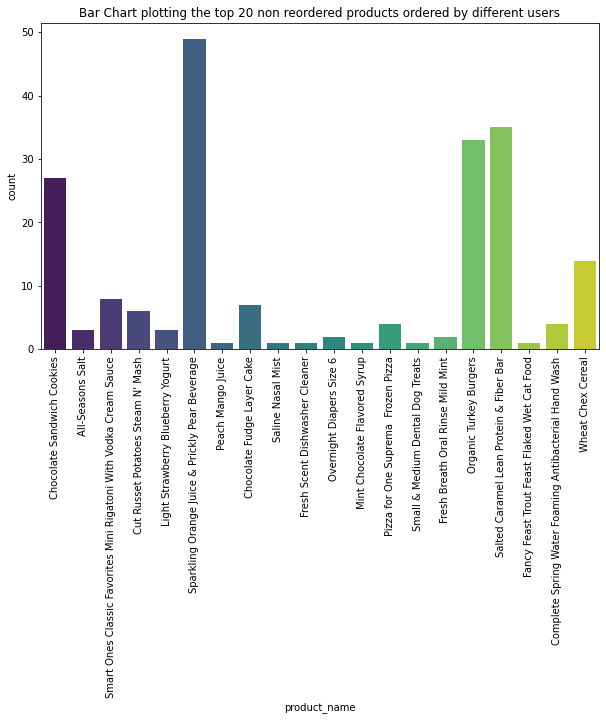

In [69]:
plt.figure(figsize=(10,6))
sns.barplot(data = not_reordered[:20] ,x='product_name', y ='count', palette='viridis')
plt.title("Bar Chart plotting the top 20 non reordered products ordered by different users")
plt.xticks(rotation = 90)
plt.show()

##### Users who have reordered the products the most

In [70]:
user_reordered = order_final[order_final.reordered == 1]
user_reordered['reordered'] = 1
user_reordered = user_reordered.groupby(['user_id'],as_index=False)['reordered'].count().sort_values(by='reordered',ascending=False)
user_reordered.head(2)

,user_id,reordered
108177,181991,71
88946,149753,65


In [71]:
user_reordered.shape

(122607, 2)

<Figure size 720x432 with 0 Axes>

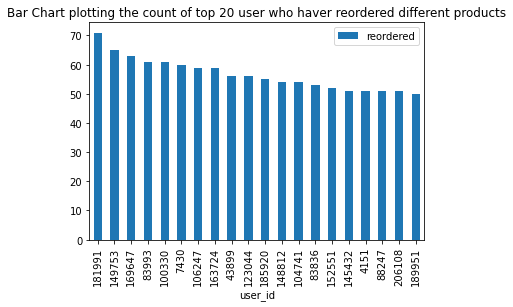

In [72]:
plt.figure(figsize=(10,6))
user_reordered[:20].plot.bar(x='user_id', y='reordered', rot=0)
plt.title("Bar Chart plotting the count of top 20 user who haver reordered different products")
plt.xticks(rotation = 90)
plt.show()

User 181991 has reordered the most number of products

### Correlation Anlysis with the reordered column


In [73]:
correlations = order_final.corr()['reordered'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(5))
print('\nMost Negative Correlations:\n', correlations.head(5))

Most Positive Correlations:
 order_id        0.001418
product_id      0.006560
order_number    0.223947
reordered       1.000000
count                NaN
Name: reordered, dtype: float64

Most Negative Correlations:
 days_since_prior_order   -0.160152
add_to_cart_order        -0.146393
department_id            -0.050294
order_hour_of_day        -0.017840
order_dow                -0.006714
Name: reordered, dtype: float64


In [74]:
correlations = pd.DataFrame(correlations, columns = ['reordered'])

In [75]:
#Top 5 correlated values
correlations["ABS_TARGET"] = np.abs(correlations)
correlations.nlargest(6, ['ABS_TARGET'])

,reordered,ABS_TARGET
reordered,1.000000,1.000000
order_number,0.223947,0.223947
days_since_prior_order,-0.160152,0.160152
add_to_cart_order,-0.146393,0.146393
department_id,-0.050294,0.050294
order_hour_of_day,-0.017840,0.017840


<Figure size 1080x1080 with 0 Axes>

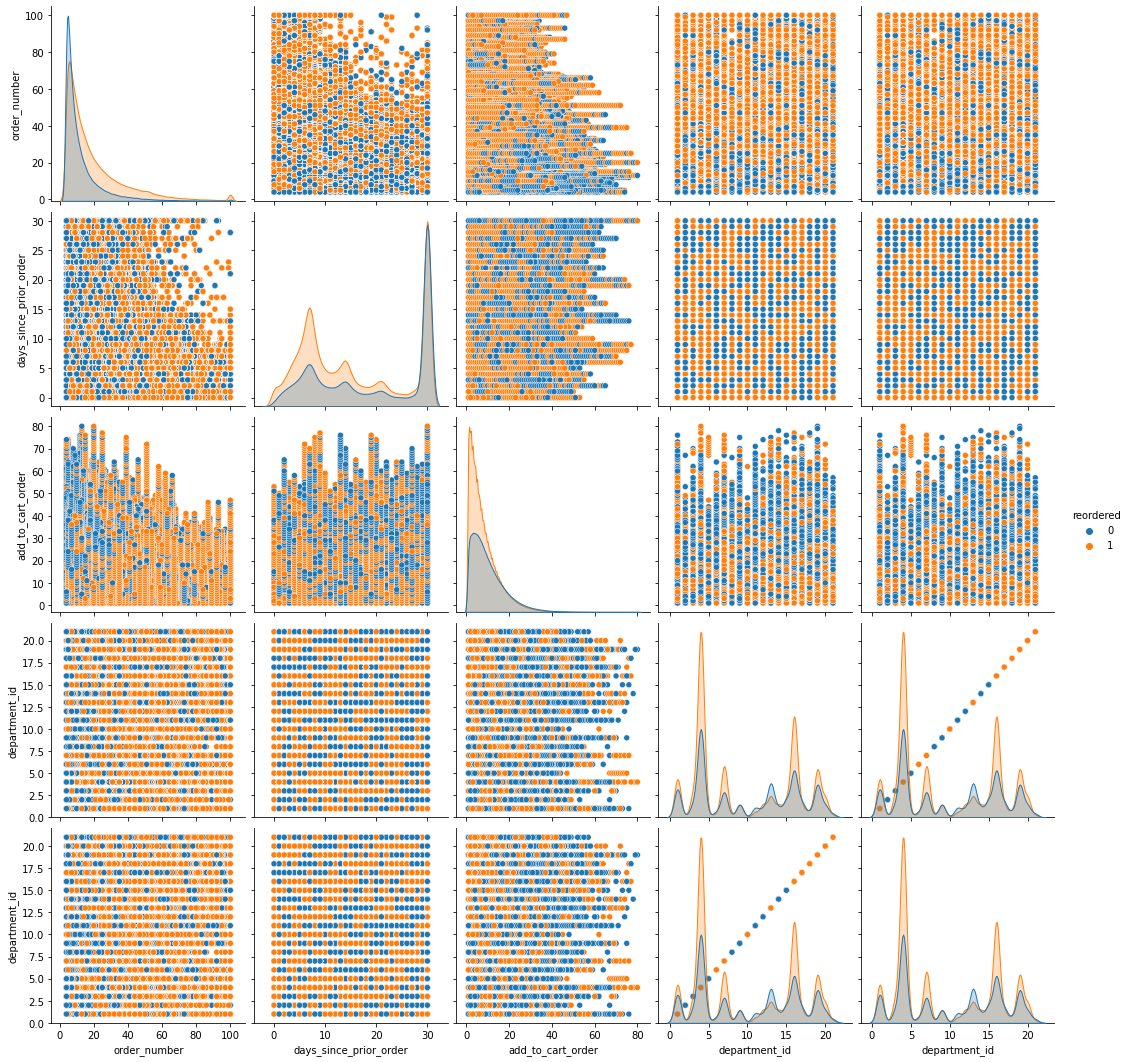

In [360]:
plt.figure(figsize=(15,15))
cols = ["order_number", "days_since_prior_order", "add_to_cart_order","department_id","department_id"]
sns.pairplot(data = order_final, hue="reordered", vars = cols, height=3)
plt.show()

In [76]:
corr = correlations.nlargest(10, ['ABS_TARGET'])

In [77]:
corr_hm = corr.drop(["ABS_TARGET"],axis=1)
corr_hm

,reordered
reordered,1.000000
order_number,0.223947
days_since_prior_order,-0.160152
add_to_cart_order,-0.146393
department_id,-0.050294
order_hour_of_day,-0.017840
order_dow,-0.006714
product_id,0.006560
user_id,-0.004316
order_id,0.001418


[Text(0.5, 1.0, 'Heat Map for the top 10 correlated values with Reordered')]

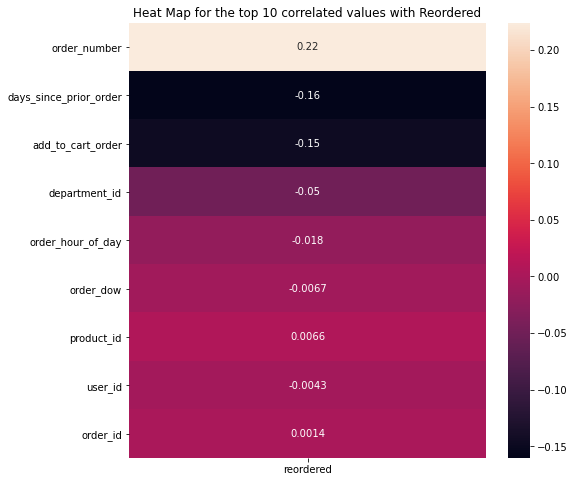

In [78]:
plt.figure(figsize=(8,8))
hm = sns.heatmap(corr_hm[1:], annot = True)
hm.set(title = "Heat Map for the top 10 correlated values with Reordered")

<Figure size 1080x576 with 0 Axes>

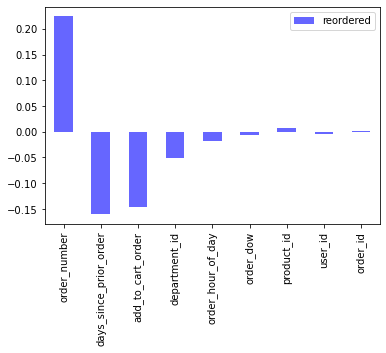

In [79]:
plt.figure(figsize=(15,8))
plot = corr_hm[1:].plot(kind = 'bar', color = 'blue',alpha =0.6)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()

In [80]:
order_final.to_csv('order_final.csv')

### References

- https://asagar60.medium.com/instacart-market-basket-analysis-part-1-introduction-eda-b08fd8250502
- https://www.kaggle.com/code/kanchanlakhlan/insta-cart-eda
- https://www.kaggle.com/code/jungeun0121/instacart-market-basket-analysis-basiceda2
- https://www.kaggle.com/code/viveksrinivasan/eda-on-instacart-market-basket-analysis/notebook
- https://towardsdatascience.com/instacart-users-segmentation-and-market-basket-analysis-d88378f75f73